**Содержание:**

1. Математическая постановка задачи

2. Решение задачи

3. Регуляризация - борьба с переобучением

4. Какое представление данных будет наилучшим, как их преобразовать

5. Реализация модели на numpy

6. Изучение реализации sklearn

7. Обучение разных реализаций и сравнение

8. Смотрим важность признаков

## **1. Математическая постановка задачи**

**Задача регрессии:** на вход подаётся вектор *$x ∈ ℝ^n$*. На выходе пораждается скалярное значение *$y ∈ ℝ$*. Линейная регрессия решает такую задачу
Обозначим *$\hat{y}$* – значение *$y$*, предсказанное моделью. Определим результат модели в виде *$\hat{y} = w^T*x$*, где *$w ∈ ℝ^n$* – вектор параметров. *$w$* - набор весов описывающих влияние отдельных признаков на результат предсказания.

Таким образом задача формулируется так: *Предсказать $y$ по $x$, вычислив значение $\hat{y} = w^T*x$*.

Также сформулировать задачу можно с помощью оценки максимального правдоподобия, но здесь такой подход подробно рассматриваться не будет

![Alt text](image.png)

## **2. Решение задачи**

Для подбора таких *$w^T$*, чтобы *$\hat{y}$* было как можно ближе к истинным значениям *$y$*, нужно ввести меру качества для *$w^T$*

Пусть имеется матрица плана с *$m$* примерами, которые мы будем использовать не для обучения, а только для оценки качества работы модели. Имеется также вектор меток, содержащий правильные значения *$y$* для каждого из этих примеров. Поскольку  этот набор данных будет использоваться только для контроля качества, назовем его тестовым набором. Обозначим матрицу плана *$X_{test}$*, а вектор меток регрессии – *$y_{test}$*. 

Один из способов измерения качества модели – вычислить среднеквадратическую ошибку модели на тестовом наборе. Если вектор *$y_{test}$* содержит предсказания модели на тестовом наборе, то среднеквадратическая ошибка определяется по формуле *$MSE_{test} = \frac{1}{m} \sum_{i=1}^{m}(\hat{y_{i}} - y_{i})^2$*

Эта мера ошибки обращается в *$0$*, когда *$\hat{y}_{test}$* = *$y_{test}$*. 

Кроме того, *$MSE_{test} = \frac{1}{m} \mid\mid \hat{y}_{test} - y_{test} \mid\mid^2_{2}$*, поэтому ошибка тем больше, чем больше евклидово расстояние между предсказаниями и метками

Мы должны спроектировать алгоритм машинного обучения, который улучшает веса *$w$* таким образом, что *$MSE_{test}$* уменьшается по мере того, как алгоритм получает новый опыт, наблюдая обучающий набор *$(X_{train}, y_{train})$*. Интуитивно понятный способ добиться этой цели – минимизировать среднеквадратическую ошибку на обучающем наборе, *$MSE_{train}$*. Для минимизации *$MSE_{train}$* нужно просто приравнять градиент к *$0$* и решить получившееся уравнение:

*$\triangledown_{w} MSE_{test} = 0$* *$\rArr$* *$\triangledown_{w} \frac{1}{m} \mid\mid \hat{y}_{test} - y_{test} \mid\mid^2_{2} = 0$* *$\rArr$* *$\triangledown_{w} (X_{train}*w - y_{train})^T(X_{train}*w - y_{train}) = 0$* *$\rArr$* *$\triangledown_{w}(w^T*X^T*X*w - 2*w^T*X^T*y + y^T*y) = 0$* 

*$\rArr$*  $\nabla\mid\mid X*w - y \mid\mid^2_{2} = 2*X^T*X*w - 2*X^T*y = 0$

$X^T*X*w = X^Ty$

$w = y*X^T(X^T*X)^{-1}$




Однако это решение считается неоптимальным, кроме того, для других моделей аналитического решения может и не существовать. К счастью, найти такой вектор *w*, при котором функция потерь минимальна, хоть и приближенно, позволяет градиентный спуск и его модификации.

*   обращение матрицы имеет сложность O($n^3$)
*   матрица $X^T*X$ может оказаться вырожденной, и тогда обращение будет невозможным
*   если заменить функционал MSE на другой, то решение для $w$, вероятнее всего, не получится

### **Градиентный спуск**

*$w^{k} = w^{k-1} - lr*\triangledown_{w_{k-1}}(L)$* Где lr - learning rate - длина шага, являкется гиперпараметром, задаётя разработчиком, может быть функцией.

![Alt text](image-10.png)

Простой градиентный спуск имеет множество недостатков, поэтому были придуманы его модификации, которые будут рассмотрены в реализации технологий глубокого обучения, а пока опишу их кратко.

![Alt text](image-14.png)

![Alt text](image-15.png)

### **Оценка решения задачи линейной регрессии - метрики и функции потерь**

**Функция потерь:** Функция потерь определяет, насколько хорошо модель справляется с текущей задачей обучения. Ее цель - создать градиент, который модель будет использовать для обновления своих параметров в процессе обучения. Функция потерь должна быть дифференцируемой и ее минимизация приводит к улучшению качества модели.

**Метрика:** Метрика, с другой стороны, представляет собой способ оценки производительности модели после обучения. Метрика измеряет, насколько хорошо модель работает на тестовых данных или в реальных условиях. Метрика может быть не дифференцируемой и не использоваться в процессе оптимизации параметров модели.

MSE также является и метрикой, по которой оценивают результат работы линейной регрессии. Кроме метрики MSE есть множество других метрик, просто MSE наиболее популярная. И хотя MSE дифференцируемая, выпуклая и обусловленная вероятностным подходом к решению данной задачи, у неё есть ряд проблем. Рассмотрим другие оценки (функции потерь по совместительству) и сравним между собой

*MSE = $\frac{1}{n} \sum_{i=1}^{n}(\hat{y_{i}} - y_{i})^2 → min$* : плохо интерпретируема, так как возвращает возведённую в квадрат оценку искомой величины

*RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(\hat{y_{i}} - y_{i})^2} → min$* : RMSE решает проблему квадрата величины, но всё ещё эта метрика остаётся плохо интерпертируемой. Например RMSE = 500 будет считаться очень плохим решением задачи, если целевая переменная расположена в промежутке от 0 до 200. Но такое значение ошибки будет считатья великолепным, если целевая переменная расположена в промежутке от 10000 до 1000000

*$R^2 = 1 - \frac{\sum_{i=1}^{n}(\hat{y_{i}} - y_{i})^2}{\sum_{i=1}^{n}({y_{i}} - \bar{y_{i}})^2}$, где $\bar{y_{i}}$* - среднее значение целевой переменной.
Если *$\hat{y_{i}} = y_{i}$*, то *$R^2$* равен *1* - это означает, что модели идеальна.

Если модель выдаёт постоянное значение, равное среднему значению целевой переменной на выборке, то *$R^2$* будет равен *0*

Модель считается приемлемой, если её *$R^2$* лежит в пределах от -бесконеность до 1. И чем ближе к единице тем лучше

Как видно, эта метрика хорошо интерпретируема. И всё-таки, для разных задач значение R^2 можно интерпертировать по-разному.

*MAE = $\frac{1}{n}\sum_{i=1}^{n}\mid \hat{y_{i}} - y_{i} \mid → min$* : Немного более устойчива к выбросам в данных. Сложна для градиентной оптимизации.

![Alt text](image-5.png) - сравнение MAE и MSE в выборке с выбросом для двух моделей. MSE уменьшает большую ошибку - ошибку на выбросе. MAE не приоретезирует ошибки на выбросах.

*HUBER LOSS* - ![Alt text](image-6.png) - компромисс между MSE и MAE. Не имеет второй производной. Дельта определяет, какие данные считаются выбросами, а какие - нет.
 
![Alt text](image-7.png) - график Huber loss

*Log-cosh = $log(cosh(a-y))$* - имеет вторую производную, похожа на HUBER LOSS.

![Alt text](image-8.png)

*MSLE = $(log(a+1) - log(y+1))^2$* - работает, если прогнозы модели и целевая переменная неотрицательны.  Она может быть полезной, когда важно учитывать относительные изменения величин, а не абсолютные значения.

*MAPE = $\mid\mid \frac{y-a}{a}\mid\mid$* - MAPE измеряет ошибку в процентах относительно истинных значений целевой переменной. Она показывает относительную точность прогнозов. Минус - несимметрична.

![Alt text](image-9.png)

Пример: Прогноз продаж товаров: Предположим, вы управляете магазином и хотите прогнозировать ежедневные продажи различных товаров. В этой задаче MAPE может помочь вам измерить точность в процентах, насколько ваши прогнозы близки к фактическим продажам.



*SMAPE*, или Симметричное среднее абсолютное процентное отклонение (Symmetric Mean Absolute Percentage Error), это метрика оценки точности прогнозов в задачах прогнозирования временных рядов и прогнозирования, особенно в сферах, где важна относительная оценка ошибки в процентах. SMAPE измеряет процентное отклонение между истинными значениями и прогнозами модели.

![Alt text](image-13.png)

*Квантильная функция потерь (Quantile Loss)* - позволяет регулировать штраф за занижение и повышение прогноза. max(q * (y-y_pred), (1-q) * (y_pred-y))
В некоторых задачах штраф за ошибку зависит не только от величины абсолютного отклонения от фактического значения, но и от знака этого отклонения. Например, лучше предсказать спрос больше, чем будет по факту, чем меньше, потому что в первом случае будет потеряна прибыль. В этом случае используется квантильная регрессия со следующей функцией потерь:
$$L(y_i, a(x_i)) = \rho_\tau(y_i - x_i^T w),$$
$$\rho_\tau(z) = \begin{cases} \tau z, \quad z > 0, \\ (\tau - 1) z, \quad z \leqslant 0 \end{cases}$$
Параметр $\tau$ влияет на то, насколько различаются штрафы за положительную и отрицательную разницу.


Функция потерь подбирается под особенности задачи.

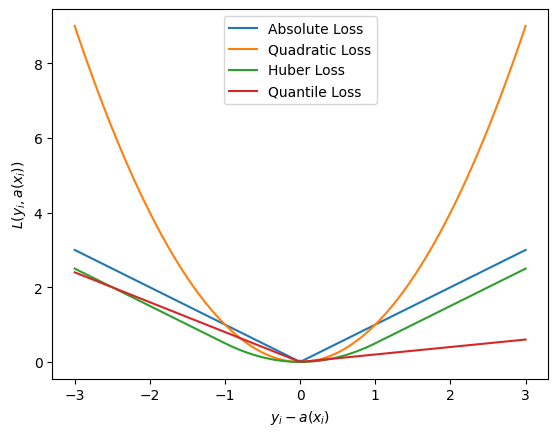

In [67]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.linspace(-3, 3, 100)
quantile_tau = 0.2
mse_loss = grid ** 2
mae_loss = np.abs(grid)
huber_loss = 0.5 * mse_loss * (grid >= -1) * (grid <= 1) + (mae_loss - 0.5) * (grid < -1) + (mae_loss - 0.5)  * (grid > 1)
quantile_loss = quantile_tau * grid * (grid > 0) + (quantile_tau - 1) * grid * (grid <= 0)
plt.plot(grid, mae_loss, label="Absolute Loss")
plt.plot(grid, mse_loss, label="Quadratic Loss")
plt.plot(grid, huber_loss, label="Huber Loss")
plt.plot(grid, quantile_loss, label="Quantile Loss")
plt.xlabel("$y_i - a(x_i)$")
plt.ylabel("$L(y_i, a(x_i))$")
plt.legend()

## **3. Регуляризация - борьба с переобучением**

В зависимости от факторов таких как размер датасета, , модель может показывать очень хорошие результаты на тренировочной выборке, но на тестовой показывать неудовлетворительные результаты. Такакя ситуация называется переобучением. При переобучении модель просто подстраивается под данные обучающей выборки, а не находит закономерности в данных. 

![Alt text](image-16.png)

Для борьбы с этой проблемой используется регуляризация. Один из способов - это штрафовать модель за слишком большие веса. Чаще всего для таких целей используют L1 - (Lasso) и L2 - (Ridge)- регуляризации.

![Alt text](image-17.png)
![Alt text](image-18.png)

Лямбда - коэф-т регуляризации, гиперпараметр, задаваемый вручную, подбором.

Также существует кобинация L1 и L2, называемая Elastic-Net регуляризацией

$\mid\mid X*w - y \mid\mid^2_{2} + λ*\mid\mid w\mid\mid_1^2 → min$ - Lasso-регрессия

$\mid\mid X*w - y \mid\mid^2_{2} + λ*\mid\mid w\mid\mid_2^2 → min$ - Ridge-регрессия

$\mid\mid X*w - y \mid\mid^2_{2} + λ*\mid\mid w\mid\mid_2^2 + λ*\mid\mid w\mid\mid_1^2→ min$ - Elastic Net-регрессия

![](image-19.png) - изменение весов разными видами регуляризации. Как видно, L1 хороша при отборе признаков, когда из большого кол-ва нужно выбрать самые важные, ведь она зануляет веса.

**1! На смещение, т.е w0 регуляризация действовать не должна! 2! Чтобы регуляризация работала, признаки при входе в модель должны быть отнормированы!**

![Alt text](image-3.png)

![Alt text](image-1.png) - математическое обоснование L1 и L2 регуляризаций

![Alt text](image-2.png)

## **4. Какое представление данных будет наилучшим, как их преобразовать (подобнее см. в Datasets/Calssification/dataset)**

Как мы уже поняли, чтобы модель не переобучилось нужно применять регуляризацию, а для регуляризации нужно подавать отнормированные признаки. Т.е ![Alt text](image-21.png)

Кроме того, в данных могут быть пропущенные значения, и в зависимотси от данных нужно их заполнить или вовсе удалить.
Иногда бывает полезно составлять новые признаки из существующих, а старые удалять, если они коррелируют. (Feature-Engineering)

Предобработка данных - очень масштабная тема, поэтому здесь будут изложены краткие принципы.

**Предобработка данных:**

*   Заполнение пропусков (чаще всего средним значением или медианой)
*   Кодировка (OneHotEncoder, LabelEncoder, BinaryEncoder, HelmetEncoder, Backward-Difference Encoder, TargetEncoding ...)
*   Масштабирование признаков (StandardDcaler, MinMaxScaler)
*   Добавление признаков (полиномиальные признаки, взятие логарифма, квадратного корня, применение тригонометрических функий)
*   Удаление выбросов/шума

## **5. Реализация модели**

In [68]:
import numpy as np

In [69]:
class CoolLinearRegression():
    def __init__(self, learning_rate = 0.001, gd_iterations = 1000 ,regularizator = 'No', regularization_coef = None):
        self.lr = learning_rate
        self.reg = regularizator
        self.lyambda = regularization_coef
        self.iters = gd_iterations
        self.loss = {
            'l1': lambda p, y: (1/len(y))*np.square(np.linalg.norm(p-y)) + self.lyambda*(np.linalg.norm(self.weights, ord = 1)),
            'l2': lambda p, y: (1/len(y))*np.square(np.linalg.norm(p-y)) + self.lyambda*np.square(np.linalg.norm(self.weights)),
            'No': lambda p, y: (1/len(y))*np.sum((p-y)**2)
        }[regularizator]
        self.loss_grad = {
            'l1': lambda X, p, y: (1/len(y))*2*X.T@(p - y) + 2 * np.array([self.lyambda if i >= 0 else -self.lyambda for i in self.weights]),
            'l2': lambda X, p, y: (1/len(y))*2*X.T@((p - y)) + 2*self.weights*self.lyambda,
            'No': lambda X, p, y: (1/len(y))*2*X.T@((p - y)),
        }[regularizator]
        self.weights = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        self.weights = np.random.randn(X.shape[1]) #Можем инициализировать 0, так как MSE выпукла и градинет сходится из любой точки
        self.b = 0
        for _ in range(self.iters):
            pred = X@self.weights + self.b
            self.losses.append(self.loss(pred, y))
            dw = self.loss_grad(X, pred, y)
            db = (1/X.shape[0])*2*np.sum(np.abs(pred - y))
            self.weights -= self.lr*dw
            self.b -= self.lr*db
    def predict(self, X):
        return X@self.weights + self.b

    def get_weights(self):
        return self.weights
    def get_losses(self):
        return self.losses


![Alt text](image-4.png)

## **5. Изучение реализации sklearn**

В sklearn линейная регрессия реализована тремя отдельными класами:

1. LinearRegression - модель, не предусматривающая регуляризацию
2. Lasso - Линейная регрессия с l1 регуляризацией
3. Ridge - Линейная регрессия с l2 регуляризацией

In [70]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
df = pd.read_csv('..\Datasets\Regression\prepared_reg_data.csv')
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
df = df.drop(columns = "Unnamed: 0")

In [72]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,-0.207142,1,3,3,0,4,0,5,...,-0.359325,0,-0.270208,0,0,1,2,8,4,208500
1,0,3,-0.091886,1,3,3,0,2,0,24,...,-0.359325,0,-0.270208,0,0,4,1,8,4,181500
2,5,3,0.073480,1,0,3,0,4,0,5,...,-0.359325,0,-0.270208,0,0,8,2,8,4,223500
3,6,3,-0.096897,1,0,3,0,0,0,6,...,4.092524,0,-0.270208,0,0,1,0,8,0,140000
4,5,3,0.375148,1,0,3,0,2,0,15,...,-0.359325,0,-0.270208,0,0,11,2,8,4,250000


In [ ]:
def drow_cors_with_target(df:pd.DataFrame, target: str):
    correlations = df.drop(columns=target).corrwith(df[target]).sort_values(ascending = False)
    plot = sns.barplot(y = correlations.index, x=correlations)
    plot.figure.set_size_inches(15,10)

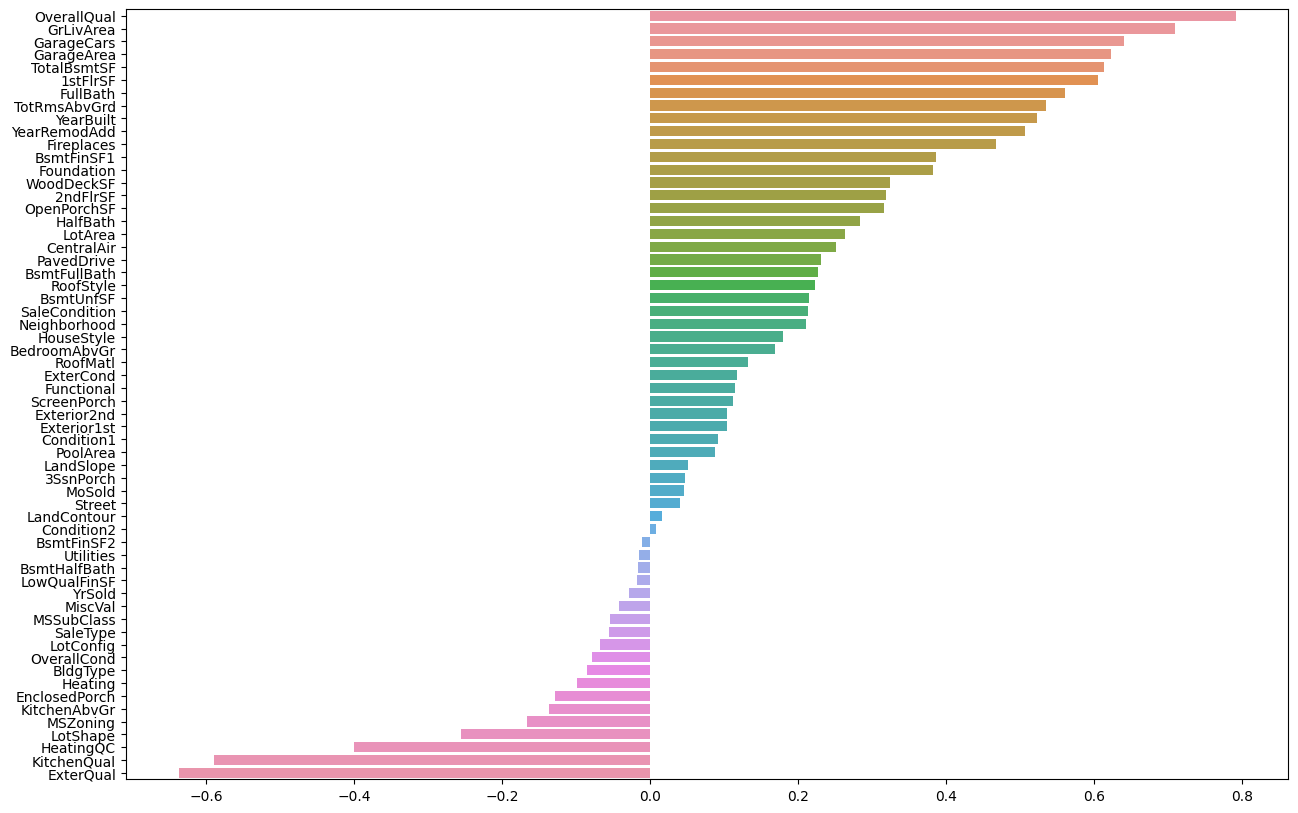

In [73]:
correlations = df.drop(columns="SalePrice").corrwith(df["SalePrice"]).sort_values(ascending=False)
plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="SalePrice"), df['SalePrice'])

In [75]:
lr = LinearRegression()
lasso = Lasso(alpha=0.5)
ridge = Ridge()

In [76]:
def fit_predit(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{model}: MSE: {mse}, R2: {r2}")
    return mse, r2

In [77]:
fit_predit(lr, X_train, y_train, X_test, y_test)
fit_predit(lasso, X_train, y_train, X_test, y_test)
fit_predit(ridge, X_train, y_train, X_test, y_test)

LinearRegression(): MSE: 2.0268235764004983e+31, R2: -2.7959246328420127e+21
Lasso(alpha=0.5): MSE: 1354856798.520606, R2: 0.8131027514647032
Ridge(): MSE: 1356469025.7431643, R2: 0.812880350962865


c:\Users\Maksim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.917e+11, tolerance: 6.541e+08
  model = cd_fast.enet_coordinate_descent(


(1356469025.7431643, 0.812880350962865)

In [78]:
cool_lr = CoolLinearRegression(gd_iterations=40000, learning_rate=0.000001)
cool_lr_l1 = CoolLinearRegression(gd_iterations=40000, learning_rate=0.000001, regularizator='l1', regularization_coef=0.5)
cool_lr_l2 = CoolLinearRegression(gd_iterations=40000, learning_rate=0.000001, regularizator='l2', regularization_coef=0.5)

In [79]:
fit_predit(cool_lr, X_train, y_train, X_test, y_test)

<__main__.CoolLinearRegression object at 0x00000258566FEBC0>: MSE: 3371775046.313977, R2: 0.5348766899024637


(3371775046.313977, 0.5348766899024637)

In [80]:
fit_predit(cool_lr_l1, X_train, y_train, X_test, y_test)
fit_predit(cool_lr_l2, X_train, y_train, X_test, y_test)

<__main__.CoolLinearRegression object at 0x00000258565BBB80>: MSE: 3371843316.1466503, R2: 0.5348672723434282
<__main__.CoolLinearRegression object at 0x00000258566FEAA0>: MSE: 3415821526.9678364, R2: 0.5288006484707357


(3415821526.9678364, 0.5288006484707357)

## **6. Смотрим важность признаков**

In [81]:
weights_lasso = lasso.coef_
weights_lasso_df = pd.DataFrame(weights_lasso)
weights_lasso_df

,0
0,-899.952265
1,-200.424187
2,3788.923925
3,25034.095430
4,-749.728741
5,3390.957006
6,0.000000
7,-349.354168
8,12567.753136
9,641.099502


In [82]:
weights_ridge = ridge.coef_
weights_ridge_df = pd.DataFrame(weights_ridge)
weights_ridge_df

,0
0,-909.002687
1,-173.457677
2,3840.801915
3,18237.791408
4,-765.990207
5,3402.011183
6,0.000000
7,-336.549148
8,12145.414751
9,642.288473


In [83]:
weights_lr1 = cool_lr_l1.get_weights()
weights_lr1_df = pd.DataFrame(weights_lr1)
weights_lr1_df

,0
MSSubClass,-413.954806
MSZoning,616.773070
LotArea,1336.867257
Street,323.802027
LotShape,-1001.712827
LandContour,933.152263
Utilities,-0.732871
LotConfig,246.150773
LandSlope,139.451486
Neighborhood,2525.375226


In [110]:
def plot_weights(weights, weights_df):
    x_ax = np.arange(len(weights))
    y_ax = weights
    print(y_ax)
    plt.plot(x_ax, y_ax)
    important = max(np.abs(np.max(weights)), np.abs(np.min(weights)))
    not_important = weights[np.argmin(np.abs(weights))]
    print(weights_df[weights_df[0] == important])
    print(weights_df[weights_df[0] == not_important])
    return weights_df[weights_df[0] == important], weights_df[weights_df[0] == not_important]

MSSubClass       -413.954806
MSZoning          616.773070
LotArea          1336.867257
Street            323.802027
LotShape        -1001.712827
LandContour       933.152263
Utilities          -0.732871
LotConfig         246.150773
LandSlope         139.451486
Neighborhood     2525.375226
Condition1       1027.484212
Condition2        622.894041
BldgType         -300.422442
HouseStyle       2103.101045
OverallQual      5858.702279
OverallCond      1072.765095
YearBuilt        2147.609062
YearRemodAdd     1892.787684
RoofStyle        1173.165611
RoofMatl          805.996557
Exterior1st      1388.276563
Exterior2nd      1537.809499
ExterQual        -992.429734
ExterCond        1479.051784
Foundation       1479.123856
BsmtFinSF1       1766.195148
BsmtFinSF2        -95.927576
BsmtUnfSF         757.966944
TotalBsmtSF      2565.445451
Heating           184.521863
HeatingQC       -2102.387417
CentralAir        574.912459
1stFlrSF         2453.879571
2ndFlrSF         1171.282994
LowQualFinSF  

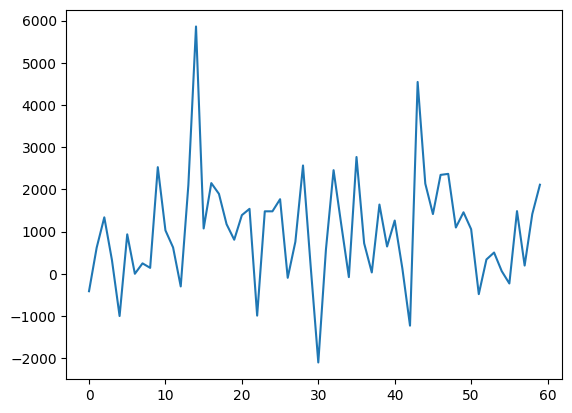

In [111]:
important, not_important = plot_weights(weights_lr1, weights_lr1_df)


[-8.99952265e+02 -2.00424187e+02  3.78892392e+03  2.50340954e+04
 -7.49728741e+02  3.39095701e+03  0.00000000e+00 -3.49354168e+02
  1.25677531e+04  6.41099502e+02  1.09445090e+02 -9.95977120e+03
 -2.27684883e+03 -6.16972704e+02  1.29839761e+04  4.09024158e+03
  8.60732416e+03 -6.50107508e+01  2.18392326e+03  8.88592031e+03
 -1.50931389e+03  5.80625198e+02 -9.63797488e+03  1.44574733e+03
  2.43371053e+03  3.59358721e+03  2.61342544e+02  2.03209512e+03
  1.87109562e+03 -2.62560373e+03 -1.48744620e+03 -1.02246700e+03
  1.45276387e+04  1.81518126e+04  4.45898762e+02 -2.78378362e+03
  1.37147767e+04  6.81463033e+03  5.53569125e+03 -8.34047291e+02
 -5.11904250e+03 -1.19531751e+04 -9.59062878e+03  5.57691425e+03
  4.17074033e+03  3.12161034e+03  1.16931293e+04 -1.34904706e+03
  4.17878772e+02  4.48050178e+03 -9.15916822e+02  5.36490187e+02
 -2.15796349e+01  2.91199059e+03 -1.63086887e+03 -1.75637220e+02
 -4.39595701e+00 -1.85340538e+03 -1.44388976e+03  4.21235809e+03]
             0
3  25034.

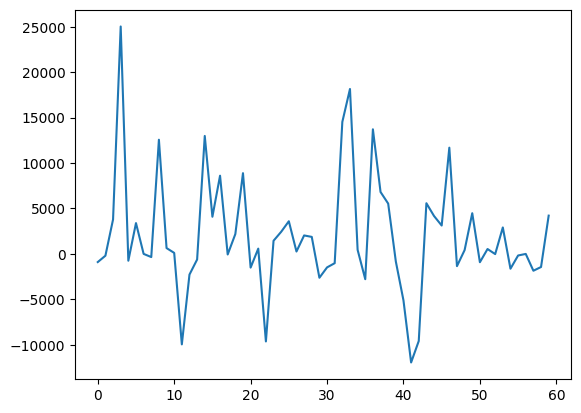

In [113]:
imp, nimp = plot_weights(weights_lasso, weights_lasso_df)

[-9.09002687e+02 -1.73457677e+02  3.84080191e+03  1.82377914e+04
 -7.65990207e+02  3.40201118e+03  0.00000000e+00 -3.36549148e+02
  1.21454148e+04  6.42288473e+02  6.18428755e+01 -9.86812217e+03
 -2.26902297e+03 -6.07385015e+02  1.29897856e+04  4.09097734e+03
  8.56019755e+03 -3.50661364e+01  2.18467074e+03  8.89889856e+03
 -1.50959922e+03  5.76236839e+02 -9.54276288e+03  1.45399706e+03
  2.47293685e+03  2.35120208e+03 -2.13327204e+02  7.79302975e+02
  3.15089229e+03 -2.56608807e+03 -1.52188549e+03 -8.21203751e+02
  7.78725911e+03  1.05866630e+04 -2.48807136e+01  6.28637423e+03
  1.35814274e+04  6.66733046e+03  5.53850836e+03 -7.88440590e+02
 -5.08958254e+03 -1.15584697e+04 -9.61588408e+03  5.55754340e+03
  4.14612388e+03  3.15739165e+03  1.15949694e+04 -1.28454554e+03
  4.38988507e+02  4.49628851e+03 -8.94757628e+02  5.42081946e+02
 -1.95812947e+01  2.92734810e+03 -1.63571219e+03 -1.85956447e+02
 -4.51939843e+00 -1.86636639e+03 -1.45296954e+03  4.20420925e+03]
              0
3  18237

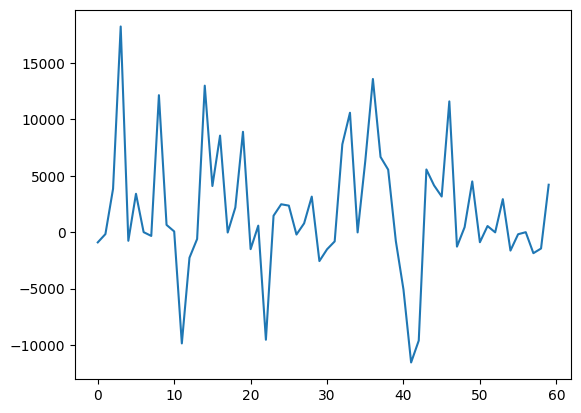

In [114]:
imp, nimp = plot_weights(weights_ridge, weights_ridge_df)